In [65]:
import os
import json
import pandas as pd

base_dir = "../MATH"

# Initialize a list to hold each record
data = []

# Loop through both 'train' and 'test' folders
for split in ["train", "test"]:
    split_path = os.path.join(base_dir, split)
    
    # Loop through each subject directory
    for subject in os.listdir(split_path):
        subject_path = os.path.join(split_path, subject)
        if not os.path.isdir(subject_path):
            continue

        # Loop through each JSON file
        for file_name in os.listdir(subject_path):
            if not file_name.endswith(".json"):
                continue

            file_path = os.path.join(subject_path, file_name)

            with open(file_path, "r") as f:
                try:
                    item = json.load(f)
                    data.append({
                        "problem": item.get("problem", ""),
                        "level": item.get("level", ""),
                        "type": item.get("type", ""),
                        "split": split,
                        "solution": item.get("solution", ""),
                    })
                except json.JSONDecodeError:
                    print(f"Failed to parse {file_path}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Optional: show shape and preview
print(f"Loaded {df.shape[0]} problems.")
df

Loaded 10106 problems.


,problem,level,type,split,solution
0,Find the value of $x$ that satisfies $\frac{\s...,Level 4,Algebra,train,We begin by cross multiplying and then squarin...
1,"Find $2^x$ if\n\n\begin{align*}\n2^x+3^y&=5,\\...",Level 4,Algebra,train,Let $2^x=a$ and $3^y=b$. Since $2^{x+2}=2^2(2...
2,What is the slope of a line parallel to $2x+4y...,Level 3,Algebra,train,We can rewrite the given equation as $y = -\fr...
3,Jack walked up a hill at a speed of $(x^2-11x-...,Level 5,Algebra,train,First we find Jill's speed in miles per hour b...
4,Simplify $\sqrt[3]{1+8} \cdot \sqrt[3]{1+\sqrt...,Level 2,Algebra,train,The first cube root becomes $\sqrt[3]{9}$. $\s...
...,...,...,...,...,...
10101,Find the center of the ellipse whose equation ...,Level 1,Intermediate Algebra,test,"Completing the square in $x$ and $y,$ we get\n..."
10102,Let a sequence be defined as follows: $a_1 = 3...,Level 5,Intermediate Algebra,test,The fact that the equation $a_{n+1}a_{n-1} = a...
10103,What is the area of the region in the $xy-$pla...,Level 4,Intermediate Algebra,test,Because $\lfloor x \rfloor$ and $\lfloor y \rf...
10104,Let $f(x) = x^{10}+5x^9-8x^8+7x^7-x^6-12x^5+4x...,Level 4,Intermediate Algebra,test,"We have\n$$f(x) = q(x)(x^2-1) + r(x),$$where $..."


In [66]:
import sys
import os

# Add parent directory to sys.path
parent_dir = os.path.abspath("..") 
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from utils import extract_answer

def safe_extract(sol_text: str):
    """Return extract_answer() result if '\\boxed' appears, else None."""
    sol_text = str(sol_text)
    return extract_answer(sol_text) if "\\boxed" in sol_text else None

df["answer"] = df["solution"].apply(safe_extract)

# ---- 4. (Optional) drop rows with no extracted answer ------------------------
# df = df.dropna(subset=["answer"]).reset_index(drop=True)

# ---- 5. Quick sanity-check ---------------------------------------------------
print(f"Total problems loaded   : {len(df):,}")
print(f"Problems with answers   : {df['answer'].notna().sum():,}")
df

Total problems loaded   : 10,106
Problems with answers   : 10,104


,problem,level,type,split,solution,answer
0,Find the value of $x$ that satisfies $\frac{\s...,Level 4,Algebra,train,We begin by cross multiplying and then squarin...,\frac{20}{3}
1,"Find $2^x$ if\n\n\begin{align*}\n2^x+3^y&=5,\\...",Level 4,Algebra,train,Let $2^x=a$ and $3^y=b$. Since $2^{x+2}=2^2(2...,3
2,What is the slope of a line parallel to $2x+4y...,Level 3,Algebra,train,We can rewrite the given equation as $y = -\fr...,-\frac{1}{2}
3,Jack walked up a hill at a speed of $(x^2-11x-...,Level 5,Algebra,train,First we find Jill's speed in miles per hour b...,4
4,Simplify $\sqrt[3]{1+8} \cdot \sqrt[3]{1+\sqrt...,Level 2,Algebra,train,The first cube root becomes $\sqrt[3]{9}$. $\s...,3
...,...,...,...,...,...,...
10101,Find the center of the ellipse whose equation ...,Level 1,Intermediate Algebra,test,"Completing the square in $x$ and $y,$ we get\n...","(2,1)"
10102,Let a sequence be defined as follows: $a_1 = 3...,Level 5,Intermediate Algebra,test,The fact that the equation $a_{n+1}a_{n-1} = a...,224
10103,What is the area of the region in the $xy-$pla...,Level 4,Intermediate Algebra,test,Because $\lfloor x \rfloor$ and $\lfloor y \rf...,10
10104,Let $f(x) = x^{10}+5x^9-8x^8+7x^7-x^6-12x^5+4x...,Level 4,Intermediate Algebra,test,"We have\n$$f(x) = q(x)(x^2-1) + r(x),$$where $...",-13x+3


In [67]:
df[df.answer.isna()]

,problem,level,type,split,solution,answer
1230,"What is the largest value of $x$, if $\frac{x}...",Level 3,Algebra,train,We multiply both sides of the equation by $10x...,None
1609,"If $(x + y)^2 = 1$ and $xy = -4$, what is the ...",Level 3,Algebra,train,We see that $(x + y)^2 = (x^2 + y^2) + 2xy = 1...,None


In [68]:
import re

# Extract digits from strings like "Level 1", "Level 2", etc.
def extract_level_number(level_str):
    match = re.search(r"\d+", str(level_str))
    return int(match.group()) if match else None

# Apply the function to the 'level' column
df["level"] = df["level"].apply(extract_level_number)
df

,problem,level,type,split,solution,answer
0,Find the value of $x$ that satisfies $\frac{\s...,4.0,Algebra,train,We begin by cross multiplying and then squarin...,\frac{20}{3}
1,"Find $2^x$ if\n\n\begin{align*}\n2^x+3^y&=5,\\...",4.0,Algebra,train,Let $2^x=a$ and $3^y=b$. Since $2^{x+2}=2^2(2...,3
2,What is the slope of a line parallel to $2x+4y...,3.0,Algebra,train,We can rewrite the given equation as $y = -\fr...,-\frac{1}{2}
3,Jack walked up a hill at a speed of $(x^2-11x-...,5.0,Algebra,train,First we find Jill's speed in miles per hour b...,4
4,Simplify $\sqrt[3]{1+8} \cdot \sqrt[3]{1+\sqrt...,2.0,Algebra,train,The first cube root becomes $\sqrt[3]{9}$. $\s...,3
...,...,...,...,...,...,...
10101,Find the center of the ellipse whose equation ...,1.0,Intermediate Algebra,test,"Completing the square in $x$ and $y,$ we get\n...","(2,1)"
10102,Let a sequence be defined as follows: $a_1 = 3...,5.0,Intermediate Algebra,test,The fact that the equation $a_{n+1}a_{n-1} = a...,224
10103,What is the area of the region in the $xy-$pla...,4.0,Intermediate Algebra,test,Because $\lfloor x \rfloor$ and $\lfloor y \rf...,10
10104,Let $f(x) = x^{10}+5x^9-8x^8+7x^7-x^6-12x^5+4x...,4.0,Intermediate Algebra,test,"We have\n$$f(x) = q(x)(x^2-1) + r(x),$$where $...",-13x+3


In [69]:
print(df[df['split'] == 'train'].shape[0], "train problems")
print(df[df['split'] == 'test'].shape[0], "test problems")

5106 train problems
5000 test problems


In [70]:
df.level.value_counts()

level
5.0    3057
4.0    2369
3.0    2204
2.0    1686
1.0     788
Name: count, dtype: int64

In [46]:
print(df[df['split'] == 'train'].level.value_counts())
print(df[df['split'] == 'test'].level.value_counts())

level
5.0    1733
4.0    1155
3.0    1073
2.0     792
1.0     351
Name: count, dtype: int64
level
5.0    1324
4.0    1214
3.0    1131
2.0     894
1.0     437
Name: count, dtype: int64


In [47]:
df.type.value_counts()

type
Algebra                   2931
Intermediate Algebra      1755
Number Theory             1409
Geometry                  1349
Counting & Probability    1245
Prealgebra                 871
Precalculus                546
Name: count, dtype: int64

In [71]:
df.to_csv("../MATH/combined_math_dataset.csv", index=False)

In [72]:
# Read the saved CSV to verify
df_loaded = pd.read_csv("../MATH/combined_math_dataset.csv")
print(f"Loaded DataFrame shape: {df_loaded.shape}")
df_loaded

Loaded DataFrame shape: (10106, 6)


,problem,level,type,split,solution,answer
0,Find the value of $x$ that satisfies $\frac{\s...,4.0,Algebra,train,We begin by cross multiplying and then squarin...,\frac{20}{3}
1,"Find $2^x$ if\n\n\begin{align*}\n2^x+3^y&=5,\\...",4.0,Algebra,train,Let $2^x=a$ and $3^y=b$. Since $2^{x+2}=2^2(2...,3
2,What is the slope of a line parallel to $2x+4y...,3.0,Algebra,train,We can rewrite the given equation as $y = -\fr...,-\frac{1}{2}
3,Jack walked up a hill at a speed of $(x^2-11x-...,5.0,Algebra,train,First we find Jill's speed in miles per hour b...,4
4,Simplify $\sqrt[3]{1+8} \cdot \sqrt[3]{1+\sqrt...,2.0,Algebra,train,The first cube root becomes $\sqrt[3]{9}$. $\s...,3
...,...,...,...,...,...,...
10101,Find the center of the ellipse whose equation ...,1.0,Intermediate Algebra,test,"Completing the square in $x$ and $y,$ we get\n...","(2,1)"
10102,Let a sequence be defined as follows: $a_1 = 3...,5.0,Intermediate Algebra,test,The fact that the equation $a_{n+1}a_{n-1} = a...,224
10103,What is the area of the region in the $xy-$pla...,4.0,Intermediate Algebra,test,Because $\lfloor x \rfloor$ and $\lfloor y \rf...,10
10104,Let $f(x) = x^{10}+5x^9-8x^8+7x^7-x^6-12x^5+4x...,4.0,Intermediate Algebra,test,"We have\n$$f(x) = q(x)(x^2-1) + r(x),$$where $...",-13x+3


# Use L1 math problems

In [73]:
import os
import json
import pandas as pd
import re

BASE_DIR = "../MATH" 
data = []

# Normalization mapping for type names
TYPE_MAPPING = {
    "algebra": "Algebra",
    "intermediate_algebra": "Intermediate Algebra",
    "geometry": "Geometry",
    "number_theory": "Number Theory",
    "prealgebra": "Prealgebra",
    "precalculus": "Precalculus",
    "counting_and_probability": "Counting & Probability"
}

for split in ("train", "test"):
    json_path = os.path.join(BASE_DIR, f"math_{split}.json")
    with open(json_path, "r") as f:
        entries = json.load(f)

    for ex in entries:
        if split == "test":
            unique_id = ex.get("unique_id", "")
            parts = unique_id.split("/")
            type_ = parts[1] if len(parts) >= 2 else "unknown"
        else:
            type_ = ex.get("type", "")

        data.append({
            "problem"   : ex.get("problem", ""),
            "level"     : ex.get("difficulty", ""),
            "type"      : type_,
            "split"     : split,
            "answer"    : ex.get("answer", ""),
        })

df_flat = pd.DataFrame(data)
df_flat["type"] = df_flat["type"].map(TYPE_MAPPING).fillna(df_flat["type"])

df_flat = df_flat[["problem", "level", "type", "answer", "split"]]

print(f"✅ Loaded {len(df_flat):,} total problems from math_train/test.json")
df_flat

✅ Loaded 7,974 total problems from math_train/test.json


,problem,level,type,answer,split
0,"Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...",5.0,Algebra,0,train
1,A rectangular band formation is a formation wi...,5.0,Algebra,98,train
2,What is the degree of the polynomial $(4 +5x^3...,3.0,Algebra,4,train
3,Evaluate $\left\lceil3\left(6-\frac12\right)\r...,3.0,Algebra,17,train
4,Sam is hired for a 20-day period. On days that...,3.0,Algebra,6,train
...,...,...,...,...,...
7969,What is the domain of the function $f(x) = \fr...,4.0,Intermediate Algebra,"(2,12) \cup (12,102)",test
7970,Let $z = 1+i$ and $w = \dfrac{3z+1}{5z+7}$. Fi...,3.0,Intermediate Algebra,\frac{5}{13},test
7971,An equiangular octagon has four sides of lengt...,5.0,Geometry,\frac{7}{2},test
7972,A sequence $(a_n)$ is defined as follows:\n\[a...,5.0,Intermediate Algebra,-1,test


In [51]:
df_flat.type.value_counts()

type
Algebra                   1864
Intermediate Algebra      1389
Prealgebra                1282
Number Theory              931
Geometry                   909
Counting & Probability     805
Precalculus                794
Name: count, dtype: int64

In [52]:
df_flat.split.value_counts()

split
train    7474
test      500
Name: count, dtype: int64

In [53]:
print(df_flat[df['split'] == 'test'].level.value_counts())

level
5.0    759
2.0    634
4.0    629
3.0    594
1.0    252
Name: count, dtype: int64


/tmp/ipykernel_3142976/4239955494.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_flat[df['split'] == 'test'].level.value_counts())


In [74]:
df_test = df_flat[df_flat['split'] == 'test']
df_test

,problem,level,type,answer,split
7474,"Convert the point $(0,3)$ in rectangular coord...",2.0,Precalculus,"\left( 3, \frac{\pi}{2} \right)",test
7475,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,5.0,Intermediate Algebra,p - q,test
7476,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...",3.0,Algebra,\frac{14}{3},test
7477,How many positive whole-number divisors does 1...,3.0,Number Theory,9,test
7478,The results of a cross-country team's training...,2.0,Algebra,\text{Evelyn},test
...,...,...,...,...,...
7969,What is the domain of the function $f(x) = \fr...,4.0,Intermediate Algebra,"(2,12) \cup (12,102)",test
7970,Let $z = 1+i$ and $w = \dfrac{3z+1}{5z+7}$. Fi...,3.0,Intermediate Algebra,\frac{5}{13},test
7971,An equiangular octagon has four sides of lengt...,5.0,Geometry,\frac{7}{2},test
7972,A sequence $(a_n)$ is defined as follows:\n\[a...,5.0,Intermediate Algebra,-1,test


In [75]:
df_test_all = df[df['split'] == 'test']
df_test_all

,problem,level,type,split,solution,answer
5106,Josh and Mike live 13 miles apart. Yesterday J...,4.0,Algebra,test,Because $\text{(rate)(time)} = \text{(distance...,5
5107,Simplify the expression $(9x^2+3x+7)+(3x^2+7x^...,3.0,Algebra,test,"Combining like terms, we find that \begin{ali...",7x^5+12x^2+3x+9
5108,"The arithmetic mean (or average) of $A$, $B$ a...",3.0,Algebra,test,"We know that $\frac{A+B+C}{3} = 10$, thus, $A+...",14
5109,Eleven pencils cost as much as three pens. If ...,2.0,Algebra,test,"If seven pens costs $\$9.24$, then each pen co...",36
5110,"Assuming $x\ne0$, simplify $\frac{12}{x \cdot ...",2.0,Algebra,test,We have \begin{align*}\n\frac{12}{x \cdot x} ...,10
...,...,...,...,...,...,...
10101,Find the center of the ellipse whose equation ...,1.0,Intermediate Algebra,test,"Completing the square in $x$ and $y,$ we get\n...","(2,1)"
10102,Let a sequence be defined as follows: $a_1 = 3...,5.0,Intermediate Algebra,test,The fact that the equation $a_{n+1}a_{n-1} = a...,224
10103,What is the area of the region in the $xy-$pla...,4.0,Intermediate Algebra,test,Because $\lfloor x \rfloor$ and $\lfloor y \rf...,10
10104,Let $f(x) = x^{10}+5x^9-8x^8+7x^7-x^6-12x^5+4x...,4.0,Intermediate Algebra,test,"We have\n$$f(x) = q(x)(x^2-1) + r(x),$$where $...",-13x+3


In [76]:
# Strip whitespace and ensure strings
df_test_all["problem"] = df_test_all["problem"].astype(str).str.strip()
df_test["problem"] = df_test["problem"].astype(str).str.strip()

# Use problem text to exclude benchmark problems
df_val = df_test_all[~df_test_all["problem"].isin(df_test["problem"])].copy()
print(f"✅ df_val has {len(df_val):,} problems.")

matched = df_test_all[df_test_all["problem"].isin(df_test["problem"])]
print(f"✅ Matched {len(matched)} problems between df_test and df_test_all.")


✅ df_val has 4,500 problems.
✅ Matched 500 problems between df_test and df_test_all.


/tmp/ipykernel_3142976/2677530281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_all["problem"] = df_test_all["problem"].astype(str).str.strip()
/tmp/ipykernel_3142976/2677530281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["problem"] = df_test["problem"].astype(str).str.strip()


In [77]:
# Merge on problem to compare columns side by side
df_matched = pd.merge(
    df_test_all, df_test,
    on="problem",
    suffixes=("_all", "_test")
)

print(f"✅ Merged {len(df_matched)} matching problems.")
df_matched

✅ Merged 500 matching problems.


,problem,level_all,type_all,split_all,solution,answer_all,level_test,type_test,answer_test,split_test
0,Let \[f(n) = \left\{\n\begin{array}{cl}\n\lflo...,4.0,Algebra,test,We begin by finding $f\left(\frac{\pi}{3}\righ...,12,4.0,Algebra,12,test
1,What is the value of $(26^2 - 24^2 - 10)^2 - 1...,2.0,Algebra,test,We know that $x^2 - y^2 = (x+y)(x-y)$. To begi...,8000,2.0,Algebra,8000,test
2,"A worker receives an annual wage of $\$20{,}00...",5.0,Algebra,test,"If the interest rate is $r$, it follows that $...",10,5.0,Algebra,10,test
3,What is the 2003rd term of the sequence of odd...,2.0,Algebra,test,"The sequence of odd numbers 1, 3, 5, 7, and so...",4005,2.0,Algebra,4005,test
4,Simplify the following:$$\frac{3}{\sqrt{27}}$$,3.0,Algebra,test,We have:\n\n$\frac{3}{\sqrt{27}}=\frac{3\sqrt{...,\frac{\sqrt{3}}{3},3.0,Algebra,\frac{\sqrt{3}}{3},test
...,...,...,...,...,...,...,...,...,...,...
495,Find the remainder when $(5x + 9)^{611} + (x +...,3.0,Intermediate Algebra,test,"By the Remainder Theorem, to find the remainde...",12,3.0,Intermediate Algebra,12,test
496,"Find the number of ordered pairs $(a,b)$ of in...",5.0,Intermediate Algebra,test,The problem asks us to count the number of com...,81,5.0,Intermediate Algebra,81,test
497,"Let $T$ be the set of all triples $(a,b,c)$ of...",5.0,Intermediate Algebra,test,"For a triangle with side lengths $a,$ $b,$ $c,...",\frac{17}{21},5.0,Intermediate Algebra,\frac{17}{21},test
498,The graphs of $x^2 + y^2 + 6x - 24y + 72 = 0$ ...,4.0,Intermediate Algebra,test,"Adding the equations, we get\n\[2x^2 + 12x - 8...",40,4.0,Intermediate Algebra,40,test


In [83]:
df_train = df_flat[df_flat['split'] == 'train']
df_train.to_csv("../MATH/math_train.csv", index=False)

print("✅ Saved to math_train.csv")
df_train

✅ Saved to math_train.csv


,problem,level,type,answer,split
0,"Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...",5.0,Algebra,0,train
1,A rectangular band formation is a formation wi...,5.0,Algebra,98,train
2,What is the degree of the polynomial $(4 +5x^3...,3.0,Algebra,4,train
3,Evaluate $\left\lceil3\left(6-\frac12\right)\r...,3.0,Algebra,17,train
4,Sam is hired for a 20-day period. On days that...,3.0,Algebra,6,train
...,...,...,...,...,...
7469,Find the number of real solutions of the equat...,3.0,Precalculus,63,train
7470,"Let $A,$ $B,$ $C$ be the angles of a triangle....",2.0,Precalculus,0,train
7471,"Let $G$ be the centroid of triangle $ABC,$ and...",2.0,Precalculus,3,train
7472,If angle $A$ lies in the second quadrant and $...,2.0,Precalculus,-\frac{\sqrt{7}}{4},train


In [87]:
df[df['split'] == 'train'].to_csv("../MATH/math_train_w_sols_5k.csv", index=False)
print("✅ Saved to math_train_w_sols_5k.csv")

df[df['split'] == 'train']

✅ Saved to math_train_w_sols_5k.csv


,problem,level,type,split,solution,answer
0,Find the value of $x$ that satisfies $\frac{\s...,4.0,Algebra,train,We begin by cross multiplying and then squarin...,\frac{20}{3}
1,"Find $2^x$ if\n\n\begin{align*}\n2^x+3^y&=5,\\...",4.0,Algebra,train,Let $2^x=a$ and $3^y=b$. Since $2^{x+2}=2^2(2...,3
2,What is the slope of a line parallel to $2x+4y...,3.0,Algebra,train,We can rewrite the given equation as $y = -\fr...,-\frac{1}{2}
3,Jack walked up a hill at a speed of $(x^2-11x-...,5.0,Algebra,train,First we find Jill's speed in miles per hour b...,4
4,Simplify $\sqrt[3]{1+8} \cdot \sqrt[3]{1+\sqrt...,2.0,Algebra,train,The first cube root becomes $\sqrt[3]{9}$. $\s...,3
...,...,...,...,...,...,...
5101,The vertices of an equilateral triangle lie on...,4.0,Intermediate Algebra,train,"Without loss of generality, suppose that the c...",108
5102,Suppose\n$$a(2+i)^4 + b(2+i)^3 + c(2+i)^2 + b(...,5.0,Intermediate Algebra,train,"Let $f(x) = ax^4+bx^3+cx^2+bx+a$. Thus, the pr...",42
5103,If $x$ is a real number and $k$ is a nonnegati...,5.0,Intermediate Algebra,train,$$\begin{aligned} \binom{1/2}{2014} &= \frac{(...,-\frac{1} { 4027}
5104,Find the minimum value of\n\[(12 - x)(10 - x)(...,4.0,Intermediate Algebra,train,"Expanding and completing the square, we get\n\...",-484


In [81]:
df_val.to_csv("../MATH/math_val.csv", index=False)

print("✅ Saved to math_val.csv")
df_val

✅ Saved to math_val.csv


,problem,level,type,split,solution,answer
5106,Josh and Mike live 13 miles apart. Yesterday J...,4.0,Algebra,test,Because $\text{(rate)(time)} = \text{(distance...,5
5107,Simplify the expression $(9x^2+3x+7)+(3x^2+7x^...,3.0,Algebra,test,"Combining like terms, we find that \begin{ali...",7x^5+12x^2+3x+9
5108,"The arithmetic mean (or average) of $A$, $B$ a...",3.0,Algebra,test,"We know that $\frac{A+B+C}{3} = 10$, thus, $A+...",14
5109,Eleven pencils cost as much as three pens. If ...,2.0,Algebra,test,"If seven pens costs $\$9.24$, then each pen co...",36
5110,"Assuming $x\ne0$, simplify $\frac{12}{x \cdot ...",2.0,Algebra,test,We have \begin{align*}\n\frac{12}{x \cdot x} ...,10
...,...,...,...,...,...,...
10100,Below is the graph of an ellipse. (Assume that...,3.0,Intermediate Algebra,test,We see that the endpoints of the major axis of...,-4
10101,Find the center of the ellipse whose equation ...,1.0,Intermediate Algebra,test,"Completing the square in $x$ and $y,$ we get\n...","(2,1)"
10102,Let a sequence be defined as follows: $a_1 = 3...,5.0,Intermediate Algebra,test,The fact that the equation $a_{n+1}a_{n-1} = a...,224
10103,What is the area of the region in the $xy-$pla...,4.0,Intermediate Algebra,test,Because $\lfloor x \rfloor$ and $\lfloor y \rf...,10


In [80]:
# Select the relevant columns
cols_to_save = [
    "problem",
    "level_test",
    "type_test",
    "solution",      # Assuming this is from df_test_all (no suffix)
    "answer_test",
    "split_test"
]

# Create a new DataFrame with selected columns
df_to_save = df_matched[cols_to_save].copy()

# Rename columns to remove '_test' suffix except for 'solution'
df_to_save.rename(columns=lambda x: x.replace("_test", ""), inplace=True)

# Save to CSV
df_to_save.to_csv("../MATH/math500_test.csv", index=False)

print("✅ Saved selected columns to math500_test.csv")
df_to_save

✅ Saved selected columns to math500_test.csv


,problem,level,type,solution,answer,split
0,Let \[f(n) = \left\{\n\begin{array}{cl}\n\lflo...,4.0,Algebra,We begin by finding $f\left(\frac{\pi}{3}\righ...,12,test
1,What is the value of $(26^2 - 24^2 - 10)^2 - 1...,2.0,Algebra,We know that $x^2 - y^2 = (x+y)(x-y)$. To begi...,8000,test
2,"A worker receives an annual wage of $\$20{,}00...",5.0,Algebra,"If the interest rate is $r$, it follows that $...",10,test
3,What is the 2003rd term of the sequence of odd...,2.0,Algebra,"The sequence of odd numbers 1, 3, 5, 7, and so...",4005,test
4,Simplify the following:$$\frac{3}{\sqrt{27}}$$,3.0,Algebra,We have:\n\n$\frac{3}{\sqrt{27}}=\frac{3\sqrt{...,\frac{\sqrt{3}}{3},test
...,...,...,...,...,...,...
495,Find the remainder when $(5x + 9)^{611} + (x +...,3.0,Intermediate Algebra,"By the Remainder Theorem, to find the remainde...",12,test
496,"Find the number of ordered pairs $(a,b)$ of in...",5.0,Intermediate Algebra,The problem asks us to count the number of com...,81,test
497,"Let $T$ be the set of all triples $(a,b,c)$ of...",5.0,Intermediate Algebra,"For a triangle with side lengths $a,$ $b,$ $c,...",\frac{17}{21},test
498,The graphs of $x^2 + y^2 + 6x - 24y + 72 = 0$ ...,4.0,Intermediate Algebra,"Adding the equations, we get\n\[2x^2 + 12x - 8...",40,test


In [88]:
# Load the saved CSV to verify
df_test_loaded = pd.read_csv("../MATH/math500_test.csv")

df_test_loaded

,problem,level,type,solution,answer,split
0,Let \[f(n) = \left\{\n\begin{array}{cl}\n\lflo...,4.0,Algebra,We begin by finding $f\left(\frac{\pi}{3}\righ...,12,test
1,What is the value of $(26^2 - 24^2 - 10)^2 - 1...,2.0,Algebra,We know that $x^2 - y^2 = (x+y)(x-y)$. To begi...,8000,test
2,"A worker receives an annual wage of $\$20{,}00...",5.0,Algebra,"If the interest rate is $r$, it follows that $...",10,test
3,What is the 2003rd term of the sequence of odd...,2.0,Algebra,"The sequence of odd numbers 1, 3, 5, 7, and so...",4005,test
4,Simplify the following:$$\frac{3}{\sqrt{27}}$$,3.0,Algebra,We have:\n\n$\frac{3}{\sqrt{27}}=\frac{3\sqrt{...,\frac{\sqrt{3}}{3},test
...,...,...,...,...,...,...
495,Find the remainder when $(5x + 9)^{611} + (x +...,3.0,Intermediate Algebra,"By the Remainder Theorem, to find the remainde...",12,test
496,"Find the number of ordered pairs $(a,b)$ of in...",5.0,Intermediate Algebra,The problem asks us to count the number of com...,81,test
497,"Let $T$ be the set of all triples $(a,b,c)$ of...",5.0,Intermediate Algebra,"For a triangle with side lengths $a,$ $b,$ $c,...",\frac{17}{21},test
498,The graphs of $x^2 + y^2 + 6x - 24y + 72 = 0$ ...,4.0,Intermediate Algebra,"Adding the equations, we get\n\[2x^2 + 12x - 8...",40,test


In [94]:
# Group by 'type' and 'level' and count problems
counts = df_test_loaded.groupby(['type', 'level']).size().reset_index(name='count')

print(counts)


                      type  level  count
0                  Algebra    1.0     17
1                  Algebra    2.0     21
2                  Algebra    3.0     26
3                  Algebra    4.0     30
4                  Algebra    5.0     30
5   Counting & Probability    1.0      2
6   Counting & Probability    2.0      7
7   Counting & Probability    3.0      4
8   Counting & Probability    4.0     13
9   Counting & Probability    5.0     12
10                Geometry    1.0      2
11                Geometry    2.0      8
12                Geometry    3.0      8
13                Geometry    4.0     10
14                Geometry    5.0     13
15    Intermediate Algebra    1.0      7
16    Intermediate Algebra    2.0     12
17    Intermediate Algebra    3.0     19
18    Intermediate Algebra    4.0     23
19    Intermediate Algebra    5.0     36
20           Number Theory    1.0      5
21           Number Theory    2.0     10
22           Number Theory    3.0     16
23           Num

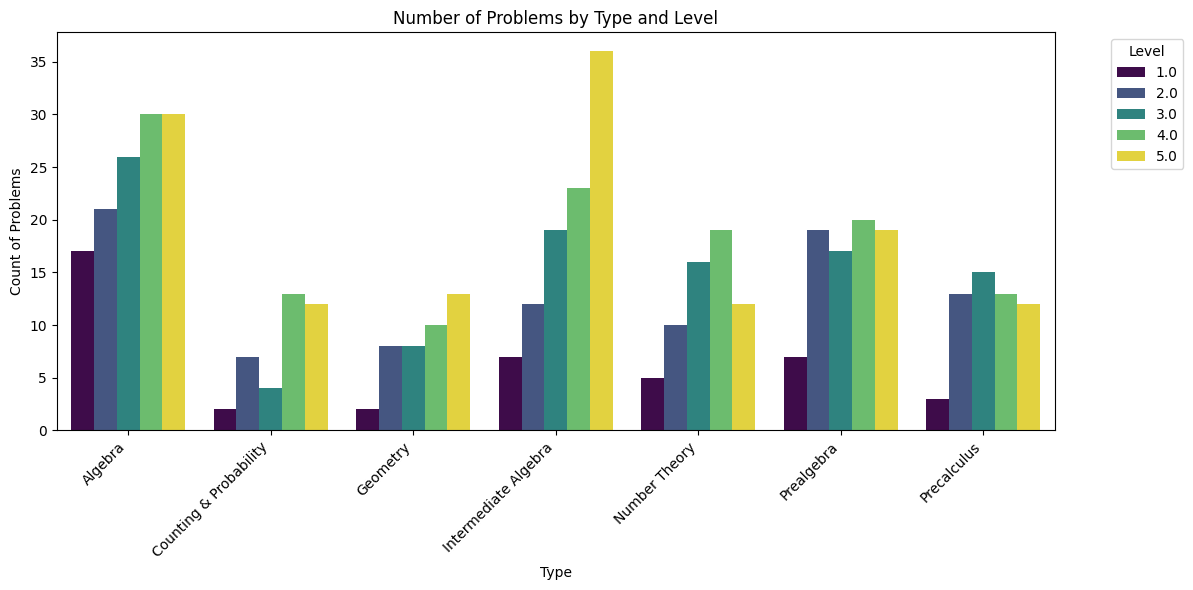

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `counts` is the DataFrame with columns: type, level, count

plt.figure(figsize=(12, 6))

# Use seaborn's barplot with 'type' on x and 'count' on y, hue='level' for grouped bars
sns.barplot(data=counts, x='type', y='count', hue='level', palette='viridis')

plt.title('Number of Problems by Type and Level')
plt.xlabel('Type')
plt.ylabel('Count of Problems')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot

plt.tight_layout()
plt.show()


In [90]:
# Group by 'type' and 'level' and count problems
counts = df_val.groupby(['type', 'level']).size().reset_index(name='count')

print(counts)

                      type  level  count
0                  Algebra    1.0    118
1                  Algebra    2.0    180
2                  Algebra    3.0    235
3                  Algebra    4.0    253
4                  Algebra    5.0    277
5   Counting & Probability    1.0     37
6   Counting & Probability    2.0     94
7   Counting & Probability    3.0     96
8   Counting & Probability    4.0     98
9   Counting & Probability    5.0    111
10                Geometry    1.0     36
11                Geometry    2.0     74
12                Geometry    3.0     94
13                Geometry    4.0    115
14                Geometry    5.0    119
15    Intermediate Algebra    1.0     45
16    Intermediate Algebra    2.0    116
17    Intermediate Algebra    3.0    176
18    Intermediate Algebra    4.0    225
19    Intermediate Algebra    5.0    244
20           Number Theory    1.0     25
21           Number Theory    2.0     82
22           Number Theory    3.0    106
23           Num

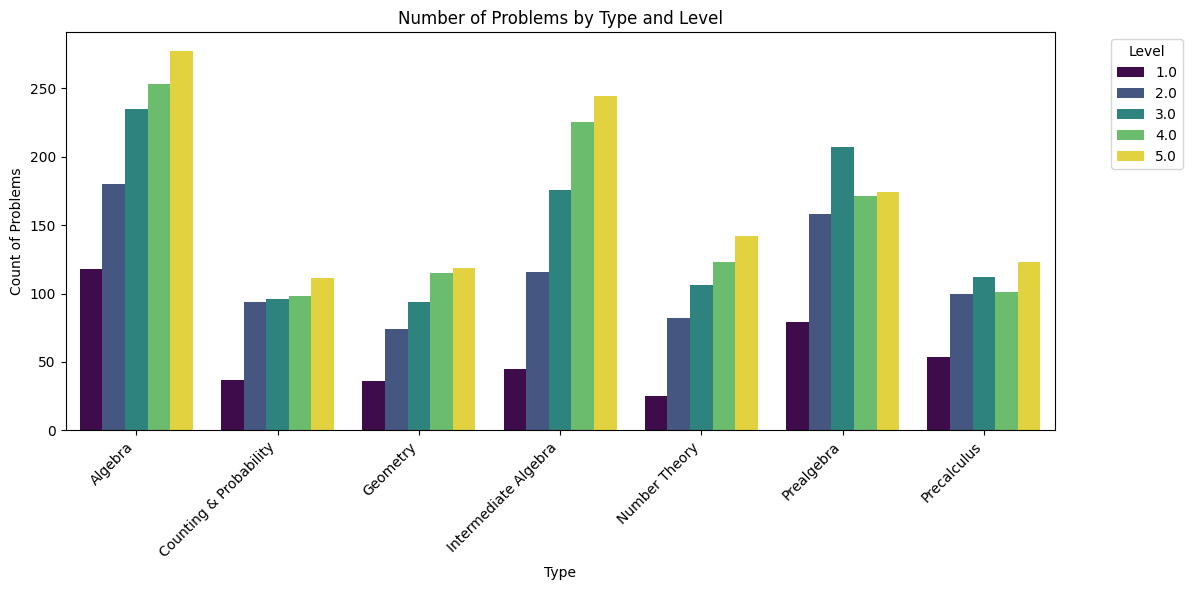

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `counts` is the DataFrame with columns: type, level, count

plt.figure(figsize=(12, 6))

# Use seaborn's barplot with 'type' on x and 'count' on y, hue='level' for grouped bars
sns.barplot(data=counts, x='type', y='count', hue='level', palette='viridis')

plt.title('Number of Problems by Type and Level')
plt.xlabel('Type')
plt.ylabel('Count of Problems')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot

plt.tight_layout()
plt.show()


In [2]:
df_2 = pd.read_csv("../scripts/data/MATH/math500_test.csv")
df_2

,problem,level,type,solution,answer,split
0,Let \[f(n) = \left\{\n\begin{array}{cl}\n\lflo...,4.0,Algebra,We begin by finding $f\left(\frac{\pi}{3}\righ...,12,test
1,What is the value of $(26^2 - 24^2 - 10)^2 - 1...,2.0,Algebra,We know that $x^2 - y^2 = (x+y)(x-y)$. To begi...,8000,test
2,"A worker receives an annual wage of $\$20{,}00...",5.0,Algebra,"If the interest rate is $r$, it follows that $...",10,test
3,What is the 2003rd term of the sequence of odd...,2.0,Algebra,"The sequence of odd numbers 1, 3, 5, 7, and so...",4005,test
4,Simplify the following:$$\frac{3}{\sqrt{27}}$$,3.0,Algebra,We have:\n\n$\frac{3}{\sqrt{27}}=\frac{3\sqrt{...,\frac{\sqrt{3}}{3},test
...,...,...,...,...,...,...
495,Find the remainder when $(5x + 9)^{611} + (x +...,3.0,Intermediate Algebra,"By the Remainder Theorem, to find the remainde...",12,test
496,"Find the number of ordered pairs $(a,b)$ of in...",5.0,Intermediate Algebra,The problem asks us to count the number of com...,81,test
497,"Let $T$ be the set of all triples $(a,b,c)$ of...",5.0,Intermediate Algebra,"For a triangle with side lengths $a,$ $b,$ $c,...",\frac{17}{21},test
498,The graphs of $x^2 + y^2 + 6x - 24y + 72 = 0$ ...,4.0,Intermediate Algebra,"Adding the equations, we get\n\[2x^2 + 12x - 8...",40,test


In [3]:
import pandas as pd

df = pd.read_parquet("../scripts/data/MATH_processed/train.parquet")
print(df.shape)
df.head()

(7474, 5)


,data_source,prompt,ability,reward_model,extra_info
0,MATH,[{'content': 'Let \[f(x) = \left\{ \begin{arra...,math,"{'ground_truth': '0', 'num_tokens': -3600, 'st...","{'index': 0, 'level': 5.0, 'split': 'train', '..."
1,MATH,[{'content': 'A rectangular band formation is ...,math,"{'ground_truth': '98', 'num_tokens': -3600, 's...","{'index': 1, 'level': 5.0, 'split': 'train', '..."
2,MATH,[{'content': 'What is the degree of the polyno...,math,"{'ground_truth': '4', 'num_tokens': -3600, 'st...","{'index': 2, 'level': 3.0, 'split': 'train', '..."
3,MATH,[{'content': 'Evaluate $\left\lceil3\left(6-\f...,math,"{'ground_truth': '17', 'num_tokens': -3600, 's...","{'index': 3, 'level': 3.0, 'split': 'train', '..."
4,MATH,[{'content': 'Sam is hired for a 20-day period...,math,"{'ground_truth': '6', 'num_tokens': -3600, 'st...","{'index': 4, 'level': 3.0, 'split': 'train', '..."


In [2]:
import pandas as pd

df2 = pd.read_parquet("../scripts/data/MATH_processed_w_level_type/train.parquet")
print(df2.shape)
df2.head()

(7474, 5)


,data_source,prompt,ability,reward_model,extra_info
0,MATH,[{'content': 'Let \[f(x) = \left\{ \begin{arra...,math,"{'ground_truth': '0', 'num_tokens': -3600, 'st...","{'index': 0, 'level': 5.0, 'split': 'train', '..."
1,MATH,[{'content': 'A rectangular band formation is ...,math,"{'ground_truth': '98', 'num_tokens': -3600, 's...","{'index': 1, 'level': 5.0, 'split': 'train', '..."
2,MATH,[{'content': 'What is the degree of the polyno...,math,"{'ground_truth': '4', 'num_tokens': -3600, 'st...","{'index': 2, 'level': 3.0, 'split': 'train', '..."
3,MATH,[{'content': 'Evaluate $\left\lceil3\left(6-\f...,math,"{'ground_truth': '17', 'num_tokens': -3600, 's...","{'index': 3, 'level': 3.0, 'split': 'train', '..."
4,MATH,[{'content': 'Sam is hired for a 20-day period...,math,"{'ground_truth': '6', 'num_tokens': -3600, 'st...","{'index': 4, 'level': 3.0, 'split': 'train', '..."


In [2]:
from datasets import load_dataset

data_path = "../scripts/data/MATH_processed/train.parquet"
train_dataset = load_dataset("parquet", data_files={"train": data_path}, split="train")

print(f"Loaded dataset with {len(train_dataset)} examples.")
print(train_dataset[0])

Generating train split: 0 examples [00:00, ? examples/s]

Loaded dataset with 7474 examples.
{'data_source': 'MATH', 'prompt': [{'content': "Let \\[f(x) = \\left\\{\n\\begin{array}{cl} ax+3, &\\text{ if }x>2, \\\\\nx-5 &\\text{ if } -2 \\le x \\le 2, \\\\\n2x-b &\\text{ if } x <-2.\n\\end{array}\n\\right.\\]Find $a+b$ if the piecewise function is continuous (which means that its graph can be drawn without lifting your pencil from the paper). Let's think step by step and output the final answer within \\boxed{}. Think for maximum 3600 tokens.", 'role': 'user'}], 'ability': 'math', 'reward_model': {'ground_truth': '0', 'num_tokens': -3600, 'style': 'rule'}, 'extra_info': {'index': 0, 'level': 5.0, 'split': 'train', 'type': 'Algebra'}}


In [3]:
train_dataset

Dataset({
    features: ['data_source', 'prompt', 'ability', 'reward_model', 'extra_info'],
    num_rows: 7474
})